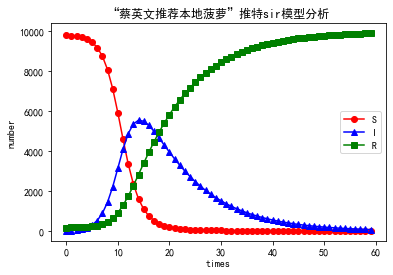

In [13]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


def sir_model(input_v, t):
    s, i, r = input_v
    n = s + i + r
    ds_dt = - beta * s * (i / n)
    di_dt = beta * s * (i / n) - gamma * i
    dr_dt = gamma * i
    return [ds_dt, di_dt, dr_dt]


if __name__ == '__main__':
    # 模型输入值
    N = 10000  # 设定总节点数量
    S0 = 9800  # S类节点数量
    I0 = 18   # I类节点数量
    R0 = N - S0 - I0  # R类节点数量
    input_value = (S0, I0, R0)
    beta = 0.68  # 设定感染率
    gamma = 0.1  # 设定免疫率
    # 设定步长 即传播次数
    times = np.linspace(0, 60, 60)
    # 求解微分方程
    result = odeint(sir_model, input_value, t=times)
    # 画图
    plt.plot(result[:, 0], '-ro', label='S')
    plt.plot(result[:, 1], '-b^', label='I')
    plt.plot(result[:, 2], '-gs', label='R')
    plt.legend(loc=0)
    plt.xlabel('times')
    plt.ylabel('number')
    plt.title('“蔡英文推荐本地菠萝”推特sir模型分析')
    plt.show()